In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
soil_df = pd.read_csv("/kaggle/input/us-drought-meteorological-data/soil_data.csv")
soil_df

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,...,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,...,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,...,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,...,1.891909,0.027488,1.919397,3,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,56037,41.660339,-108.875676,2085,0.0016,0.0281,0.1763,0.3554,0.2121,0.2097,...,0.000000,0.000000,0.000000,1,1,3,1,1,1,3
3105,56039,44.049321,-110.588102,2564,0.0003,0.0026,0.0166,0.0722,0.1489,0.5005,...,2.922309,0.000000,2.922309,1,1,1,1,1,1,1
3106,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
3107,56041,41.284726,-110.558947,2327,0.0050,0.2009,0.4063,0.1858,0.0964,0.1031,...,1.013702,10.755590,11.769293,1,1,2,1,1,1,2


In [3]:
test_X = pd.read_csv("/kaggle/input/us-drought-meteorological-data/test_timeseries/test_timeseries.csv")
train_X = pd.read_csv("/kaggle/input/us-drought-meteorological-data/train_timeseries/train_timeseries.csv")
valid_X = pd.read_csv("/kaggle/input/us-drought-meteorological-data/validation_timeseries/validation_timeseries.csv")
test_X

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0000
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,...,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,...,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,...,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,...,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271943,56043,2020-12-27,3.83,82.91,2.77,-3.61,-6.77,-5.19,0.24,-9.07,...,-5.88,2.98,6.04,0.72,5.31,4.56,7.68,1.03,6.66,NaN
2271944,56043,2020-12-28,0.00,83.04,1.82,-7.31,-12.06,-9.68,-1.48,-11.51,...,-10.61,1.83,2.81,0.10,2.72,2.52,3.69,0.14,3.56,NaN
2271945,56043,2020-12-29,0.00,82.78,1.87,-7.38,-11.79,-9.59,-0.88,-11.39,...,-10.81,2.70,6.22,0.18,6.04,3.84,7.66,0.29,7.37,3.5182
2271946,56043,2020-12-30,0.01,82.87,1.57,-6.40,-13.94,-10.17,1.33,-12.16,...,-8.74,2.93,4.10,1.62,2.48,4.42,6.05,2.79,3.26,NaN


In [4]:
# Check if data of the same fips exists
(soil_df.groupby('fips').size() > 1).values.any()

False

In [5]:
# Eliminate NaN
test_X = test_X[test_X['score'].notnull()].reset_index(drop=True)
train_X = train_X[train_X['score'].notnull()].reset_index(drop=True)
valid_X = valid_X[valid_X['score'].notnull()].reset_index(drop=True)
test_X = test_X.drop('date', 1)
train_X = train_X.drop('date', 1)
valid_X = valid_X.drop('date', 1)
test_X

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0000
1,1001,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,10.68,13.05,2.33,3.40,1.68,1.72,5.13,6.51,3.67,2.85,0.0000
2,1001,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,8.38,3.91,1.73,2.40,1.36,1.04,3.28,4.13,2.39,1.75,0.0000
3,1001,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,14.06,6.08,3.68,4.57,2.49,2.07,6.65,8.56,5.01,3.55,0.0000
4,1001,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,12.52,2.18,3.10,4.52,1.71,2.81,5.62,6.96,3.60,3.35,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326335,56043,1.24,83.55,2.58,-2.42,-7.58,-5.00,0.38,-6.79,7.17,-2.74,5.42,8.52,2.85,5.68,7.81,10.34,5.13,5.21,3.5109
326336,56043,0.00,83.70,2.05,1.32,-10.65,-4.67,8.08,-3.27,11.35,-1.57,3.05,3.85,2.36,1.49,4.73,6.30,3.85,2.45,3.5109
326337,56043,0.14,82.90,2.04,-5.19,-10.64,-7.91,0.29,-8.63,8.93,-6.81,2.88,3.90,1.68,2.21,4.39,6.50,2.83,3.66,3.5182
326338,56043,1.64,82.00,3.13,-0.05,-5.29,-2.67,6.87,-7.05,13.93,-0.82,8.83,13.78,6.64,7.14,11.90,17.31,9.05,8.25,3.5182


In [6]:
train_X

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
1,1001,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2.0
2,1001,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,2.63,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2.0
3,1001,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,3.35,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2.0
4,1001,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,2.03,2.74,0.88,1.86,4.18,6.38,1.27,5.11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756791,56043,0.04,82.47,2.19,-4.27,-9.36,-9.26,-1.51,-7.22,5.71,-4.38,6.93,10.27,3.08,7.18,9.42,12.59,5.62,6.97,0.0
2756792,56043,0.13,82.59,0.91,-11.96,-18.65,-17.90,-6.85,-15.24,8.39,-11.98,2.27,3.97,0.95,3.02,3.07,5.16,0.83,4.33,0.0
2756793,56043,0.02,82.86,1.40,-9.56,-14.18,-13.95,-2.69,-13.01,10.32,-10.95,3.64,6.59,1.28,5.31,5.33,8.35,2.13,6.22,0.0
2756794,56043,0.32,83.12,2.73,-2.55,-6.90,-6.84,2.66,-7.77,10.42,-3.94,6.16,8.43,3.44,4.99,8.99,10.14,6.67,3.47,0.0


In [7]:
# Y
test_Y = test_X[['fips', 'score']]
train_Y = train_X[['fips', 'score']]
valid_Y = valid_X[['fips', 'score']]
test_Y

,fips,score
0,1001,0.0000
1,1001,0.0000
2,1001,0.0000
3,1001,0.0000
4,1001,0.0000
...,...,...
326335,56043,3.5109
326336,56043,3.5109
326337,56043,3.5182
326338,56043,3.5182


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:>

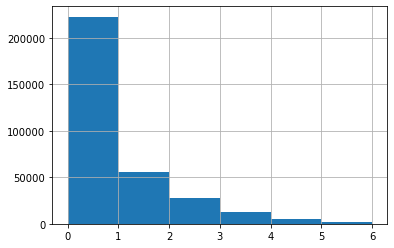

In [8]:
def convert_float_score_into_int_score(input_Y):
    input_Y.loc[(input_Y['score'] > 0) & (input_Y['score'] <= 1), 'score'] = 1
    input_Y.loc[(input_Y['score'] > 1) & (input_Y['score'] <= 2), 'score'] = 2
    input_Y.loc[(input_Y['score'] > 2) & (input_Y['score'] <= 3), 'score'] = 3
    input_Y.loc[(input_Y['score'] > 3) & (input_Y['score'] <= 4), 'score'] = 4
    input_Y.loc[(input_Y['score'] > 4), 'score'] = 5
    input_Y['score'] = input_Y['score'].astype('int')
    return input_Y
test_Y = convert_float_score_into_int_score(test_Y)
train_Y = convert_float_score_into_int_score(train_Y)
valid_Y = convert_float_score_into_int_score(valid_Y)
test_Y['score'].hist(bins=[0, 1, 2, 3, 4, 5, 6])

In [9]:
# Drop score column
test_X.drop(columns = ['score'], inplace = True)
test_X

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1001,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78
1,1001,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,10.68,13.05,2.33,3.40,1.68,1.72,5.13,6.51,3.67,2.85
2,1001,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,8.38,3.91,1.73,2.40,1.36,1.04,3.28,4.13,2.39,1.75
3,1001,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,14.06,6.08,3.68,4.57,2.49,2.07,6.65,8.56,5.01,3.55
4,1001,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,12.52,2.18,3.10,4.52,1.71,2.81,5.62,6.96,3.60,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326335,56043,1.24,83.55,2.58,-2.42,-7.58,-5.00,0.38,-6.79,7.17,-2.74,5.42,8.52,2.85,5.68,7.81,10.34,5.13,5.21
326336,56043,0.00,83.70,2.05,1.32,-10.65,-4.67,8.08,-3.27,11.35,-1.57,3.05,3.85,2.36,1.49,4.73,6.30,3.85,2.45
326337,56043,0.14,82.90,2.04,-5.19,-10.64,-7.91,0.29,-8.63,8.93,-6.81,2.88,3.90,1.68,2.21,4.39,6.50,2.83,3.66
326338,56043,1.64,82.00,3.13,-0.05,-5.29,-2.67,6.87,-7.05,13.93,-0.82,8.83,13.78,6.64,7.14,11.90,17.31,9.05,8.25


In [10]:
train_X.drop(columns = ['score'], inplace = True)
valid_X.drop(columns = ['score'], inplace = True)

In [11]:
# Null check
print("test_X has any null?: " + str(test_X.isnull().values.any()))
print("train_X has any null?: " + str(train_X.isnull().values.any()))
print("valid_X has any null?: " + str(valid_X.isnull().values.any()))
print("soil_df has any null?: " + str(soil_df.isnull().values.any()))

test_X has any null?: False
train_X has any null?: False
valid_X has any null?: False
soil_df has any null?: False


In [12]:
# Merge soil and X meteo
test_X = test_X.merge(soil_df)
train_X = train_X.merge(soil_df)
valid_X = valid_X.merge(soil_df)
test_X

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1001,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,10.68,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
2,1001,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,8.38,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
3,1001,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,14.06,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
4,1001,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,12.52,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326335,56043,1.24,83.55,2.58,-2.42,-7.58,-5.00,0.38,-6.79,7.17,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
326336,56043,0.00,83.70,2.05,1.32,-10.65,-4.67,8.08,-3.27,11.35,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
326337,56043,0.14,82.90,2.04,-5.19,-10.64,-7.91,0.29,-8.63,8.93,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
326338,56043,1.64,82.00,3.13,-0.05,-5.29,-2.67,6.87,-7.05,13.93,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1


In [13]:
train_X

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1001,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
2,1001,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
3,1001,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
4,1001,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756791,56043,0.04,82.47,2.19,-4.27,-9.36,-9.26,-1.51,-7.22,5.71,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
2756792,56043,0.13,82.59,0.91,-11.96,-18.65,-17.90,-6.85,-15.24,8.39,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
2756793,56043,0.02,82.86,1.40,-9.56,-14.18,-13.95,-2.69,-13.01,10.32,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
2756794,56043,0.32,83.12,2.73,-2.55,-6.90,-6.84,2.66,-7.77,10.42,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1


In [14]:
# Standardize features by removing the mean and scaling to unit variance
scaler = MinMaxScaler()
train_X = pd.DataFrame(np.append(train_X.iloc[:, :2].values, scaler.fit_transform(train_X.iloc[:, 2:]), axis=1), columns=train_X.columns)

In [15]:
valid_X = pd.DataFrame(np.append(valid_X.iloc[:, :2].values, scaler.transform(valid_X.iloc[:, 2:]), axis=1), columns=valid_X.columns)

In [16]:
test_X = pd.DataFrame(np.append(test_X.iloc[:, :2].values, scaler.transform(test_X.iloc[:, 2:]), axis=1), columns=test_X.columns)

In [17]:
test_X

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001.0,2.25,0.912798,0.434486,0.670724,0.786230,0.785817,0.609540,0.707917,0.209930,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
1,1001.0,0.05,0.914408,0.391720,0.649860,0.761515,0.761110,0.643739,0.686586,0.350550,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
2,1001.0,0.00,0.927824,0.177434,0.526281,0.583855,0.584309,0.506943,0.572542,0.273909,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
3,1001.0,0.03,0.929702,0.219290,0.554634,0.629915,0.618322,0.545899,0.536305,0.463179,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
4,1001.0,5.79,0.908774,0.161510,0.503812,0.562189,0.552382,0.480329,0.487625,0.411863,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326335,56043.0,1.24,0.457741,0.111010,0.441621,0.447119,0.488689,0.390975,0.465746,0.233589,...,0.000000,0.000000,0.00000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
326336,56043.0,0.00,0.461765,0.086897,0.491641,0.397849,0.493984,0.489972,0.513879,0.372876,...,0.000000,0.000000,0.00000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
326337,56043.0,0.14,0.440301,0.086442,0.404574,0.398010,0.442002,0.389817,0.440585,0.292236,...,0.000000,0.000000,0.00000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
326338,56043.0,1.64,0.416152,0.136033,0.473318,0.483871,0.526071,0.474415,0.462191,0.458847,...,0.000000,0.000000,0.00000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857


In [18]:
test_Y.drop(columns = ['fips'], inplace = True)
train_Y.drop(columns = ['fips'], inplace = True)
valid_Y.drop(columns = ['fips'], inplace = True)
test_X.drop(columns = ['fips'], inplace = True)
train_X.drop(columns = ['fips'], inplace = True)
valid_X.drop(columns = ['fips'], inplace = True)
test_X


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,2.25,0.912798,0.434486,0.670724,0.786230,0.785817,0.609540,0.707917,0.209930,0.650301,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
1,0.05,0.914408,0.391720,0.649860,0.761515,0.761110,0.643739,0.686586,0.350550,0.630462,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
2,0.00,0.927824,0.177434,0.526281,0.583855,0.584309,0.506943,0.572542,0.273909,0.515696,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
3,0.03,0.929702,0.219290,0.554634,0.629915,0.618322,0.545899,0.536305,0.463179,0.542943,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
4,5.79,0.908774,0.161510,0.503812,0.562189,0.552382,0.480329,0.487625,0.411863,0.493973,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326335,1.24,0.457741,0.111010,0.441621,0.447119,0.488689,0.390975,0.465746,0.233589,0.432195,...,0.000000,0.000000,0.00000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
326336,0.00,0.461765,0.086897,0.491641,0.397849,0.493984,0.489972,0.513879,0.372876,0.446886,...,0.000000,0.000000,0.00000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
326337,0.14,0.440301,0.086442,0.404574,0.398010,0.442002,0.389817,0.440585,0.292236,0.381090,...,0.000000,0.000000,0.00000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
326338,1.64,0.416152,0.136033,0.473318,0.483871,0.526071,0.474415,0.462191,0.458847,0.456303,...,0.000000,0.000000,0.00000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error

In [20]:
train_X.shape,test_X.shape,valid_X.shape

((2756796, 49), (326340, 49), (323232, 49))

In [21]:
train_Y.shape,test_Y.shape,valid_Y.shape

((2756796, 1), (326340, 1), (323232, 1))

In [22]:
train_Y['score'].value_counts()

0    1480827
1     532931
2     329007
3     225007
4     132089
5      56935
Name: score, dtype: int64

In [23]:
train_X.shape,test_X.shape,valid_X.shape

((2756796, 49), (326340, 49), (323232, 49))

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
import tensorflow as tf
from keras.layers import Dense, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam,RMSprop
import sys

In [25]:
train_X

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,15.95,0.906896,0.285714,0.626454,0.666506,0.666774,0.618668,0.588131,0.525158,0.608614,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
1,1.33,0.909847,0.295268,0.627524,0.694592,0.694690,0.628825,0.636811,0.433189,0.597564,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
2,1.11,0.909579,0.427207,0.664973,0.781576,0.781646,0.618025,0.681389,0.296568,0.644776,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
3,0.00,0.902066,0.086897,0.463555,0.441502,0.445051,0.458730,0.483933,0.364878,0.458940,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
4,0.00,0.925946,0.146497,0.501538,0.541005,0.541633,0.527771,0.501026,0.502166,0.490206,...,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756791,0.04,0.428763,0.093267,0.416878,0.418552,0.420343,0.366675,0.459866,0.184938,0.411602,...,0.000000,0.000000,0.00000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
2756792,0.13,0.431983,0.035032,0.314030,0.269459,0.281726,0.298020,0.350198,0.274242,0.316173,...,0.000000,0.000000,0.00000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
2756793,0.02,0.439227,0.057325,0.346128,0.341197,0.345099,0.351504,0.380692,0.338554,0.329106,...,0.000000,0.000000,0.00000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
2756794,0.32,0.446203,0.117834,0.439882,0.458032,0.459169,0.420288,0.452345,0.341886,0.417127,...,0.000000,0.000000,0.00000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857


In [26]:
train_X.shape

(2756796, 49)

In [27]:
type(train_X)

pandas.core.frame.DataFrame

In [28]:
arr = train_X.to_numpy()

In [38]:
arr[0].shape

(49,)

In [29]:
arr[0].tofile('testSample0.csv', sep = ',')

In [30]:
arr[2].tofile('testSample2.csv', sep = ',')

In [31]:
arr[16].tofile('testSample16.csv', sep = ',')

In [32]:
arr[60].tofile('testSample60.csv', sep = ',')

In [33]:
arr[3250].tofile('testSample3250.csv', sep = ',')

In [40]:
model = Sequential()
model.add(Dense(512, input_dim=train_X.shape[1], activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               25600     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)               

In [41]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [43]:
train_Y.shape,test_Y.shape,valid_Y.shape

((2756796, 1), (326340, 1), (323232, 1))

In [44]:
train_Y

,score
0,1
1,2
2,2
3,2
4,1
...,...
2756791,0
2756792,0
2756793,0
2756794,0


In [45]:
# Compile the Neural network
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit to training data
model.fit(train_X, train_Y, epochs=50,batch_size=5000,validation_data=(valid_X,valid_Y),
                    callbacks=[callback])

Epoch 1/50
552/552 [==============================] - 23s 40ms/step - loss: 1.2700 - accuracy: 0.5354 - val_loss: 1.1063 - val_accuracy: 0.5901
Epoch 2/50
552/552 [==============================] - 23s 41ms/step - loss: 1.2123 - accuracy: 0.5417 - val_loss: 1.1018 - val_accuracy: 0.5907
Epoch 3/50
552/552 [==============================] - 23s 41ms/step - loss: 1.2022 - accuracy: 0.5439 - val_loss: 1.1155 - val_accuracy: 0.5897
Epoch 4/50
552/552 [==============================] - 22s 40ms/step - loss: 1.1955 - accuracy: 0.5451 - val_loss: 1.1047 - val_accuracy: 0.5929
Epoch 5/50
552/552 [==============================] - 23s 42ms/step - loss: 1.1911 - accuracy: 0.5462 - val_loss: 1.0979 - val_accuracy: 0.5926
Epoch 6/50
552/552 [==============================] - 23s 41ms/step - loss: 1.1872 - accuracy: 0.5467 - val_loss: 1.0868 - val_accuracy: 0.5939
Epoch 7/50
552/552 [==============================] - 23s 42ms/step - loss: 1.1840 - accuracy: 0.5472 - val_loss: 1.1132 - val_accuracy:

In [46]:
loss, acc = model.evaluate(test_X, test_Y, verbose=2)

10199/10199 - 16s - loss: 0.9833 - accuracy: 0.6704


In [47]:
model.save("droughtmodel.h5")
print("model saved")

model saved


In [48]:
sorted(test_X)

['CULTIR_LAND',
 'CULTRF_LAND',
 'CULT_LAND',
 'FOR_LAND',
 'GRS_LAND',
 'NVG_LAND',
 'PRECTOT',
 'PS',
 'QV2M',
 'SQ1',
 'SQ2',
 'SQ3',
 'SQ4',
 'SQ5',
 'SQ6',
 'SQ7',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'URB_LAND',
 'WAT_LAND',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'aspectE',
 'aspectN',
 'aspectS',
 'aspectUnknown',
 'aspectW',
 'elevation',
 'lat',
 'lon',
 'slope1',
 'slope2',
 'slope3',
 'slope4',
 'slope5',
 'slope6',
 'slope7',
 'slope8']

In [49]:
sorted(test_Y)

['score']